# | Uber Data Analysis |
Uber is a ride-sharing app that has its inception in the 2008 financial crisis. Uber is an app that allows people to conveniently hail a CHEAP cab using an app, and it helps people with a car to get a SECOND income. Early in 2017, the NYC Taxi and Limousine Commission (TLC) released a dataset about Uber's ridership in 2014. This project aims to:

Visualize Uber's ridership growth in NYC during the period characterize the demand based on identified patterns in the time series estimate the value of the NYC market for Uber, and its revenue growth other insights about the usage of the service
attempt to predict the demand's growth beyond 2014.

## Import Libraries

The first step in the project is to load the libraries that we know that we will use throughout the notebook.

In [1]:
import pandas as pd
import geopandas as gpd
import seaborn as sns

from shapely.geometry import Point, Polygon
from matplotlib import pyplot as plt

## Load Data
Next we proceed to load the data set that we will use in our analysis.

In [2]:
df = pd.read_csv('./uberRawDataApr14.csv.txt')
df.head()
#df.tail()

,Date/Time,Lat,Lon,Base
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512


## Data Cleaning
We must make our dataFrame easier to manipulate in order to effectively analyze.


### Changing date format.

In [3]:
df['Date/Time'] = df['Date/Time'].map(pd.to_datetime)
df.head()

,Date/Time,Lat,Lon,Base
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512


First we modifiy the data and time column. The data is changed from 'mm/dd/yyyy hh:mm:ss' to 'yyy-mm-dd hh:mm:ss'. This change will allow us to grab certain information from the 'Date/Time' using ".Time/Date" functions.

### Obtaining Day of the Month from date.
In this section we get the day of the month from the date. The day of the month (DoM) should be 1 - 31. The format should be m or mm.

In [4]:
def getDay(dt):
    return dt.day

df['Day'] = df['Date/Time'].map(getDay)

In [5]:
df.head()
#df.tail()

,Date/Time,Lat,Lon,Base,Day
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,1
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,1
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,1
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512,1
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512,1


### Get weekday, number (0-7), and hour.
In this section we get the day of the week (DoW) and the hour from the date.

In [6]:
def getWeekday(dt):
    return dt.weekday()

df['Weekday'] = df['Date/Time'].map(getWeekday)

def getHour(dt):
    return dt.hour

df['Hour'] = df['Date/Time'].map(getHour)

We save the weekday, and the hour from the Date/Time column on their own new column. We also then print the first 5 rows of the data.

In [7]:
df.head()
#df.tail()

,Date/Time,Lat,Lon,Base,Day,Weekday,Hour
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,1,1,0
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,1,1,0
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,1,1,0
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512,1,1,0
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512,1,1,0


## Data Analysis
We proceed to get insights from the Uber data.

### Date of Month Usership.
We view the Uber Ridership by day of the month.

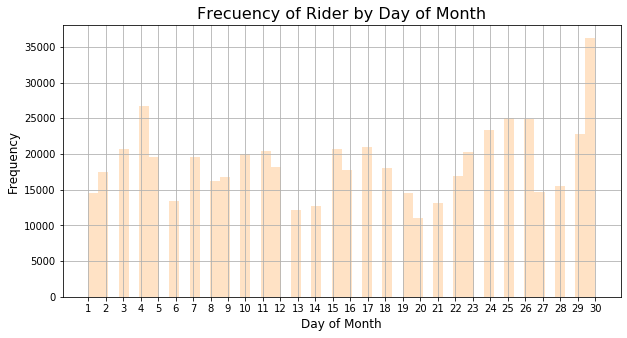

In [8]:
sns.set_palette("gist_heat_r")
plt.rcParams["figure.figsize"] = (10,5)

plt.grid()
sns.distplot(df['Day'],kde = False)
plt.title('Frecuency of Rider by Day of Month', fontsize=16)
plt.xticks(range(1,31))
plt.xlabel('Day of Month', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

###### Graph 1. The Frecuency of Uber Ridership by DoM. 

We can see that the day with the most uber usage is in day 30 followed by day 04.

#### Plotting Sorted Date of Month Usership.

In [9]:
#for k, rows in df.groupby('Day'):
#    print((k, len(rows)))

def countRows(rows):
    return len(rows)

dom = df.groupby('Day').apply(countRows)
dateSorted = dom.sort_values()

We use .groupby() to sort the data by 'Day', this will allow us to plot the data by the frequency of use by day of the month.

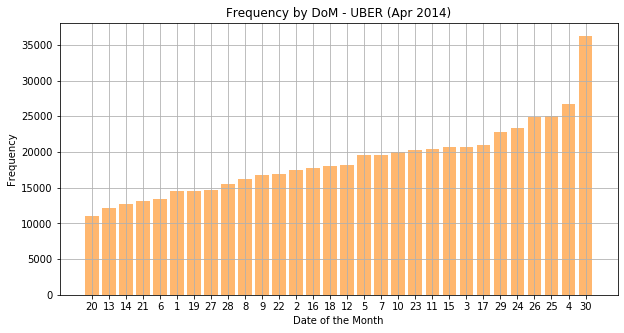

In [10]:
plt.bar(range(1, 31), dateSorted)
plt.xticks(range(1,31), dateSorted.index)
plt.xlabel('Date of the Month')
plt.ylabel('Frequency')
plt.title('Frequency by DoM - UBER (Apr 2014)')
plt.rcParams["figure.figsize"] = (10,5)
plt.grid()
#plt.figure(num=None, figsize=(4, 2), dpi=20, facecolor='b', edgecolor='k')
#plt.show()

###### Graph 2. Sorted Uber Ridership by day of the month.
Once we have the data sorted, we can see that the days with the most active days are at the end and the beginning of the month.

### Ridership Hourly Usage.
We view the ridership by hour.

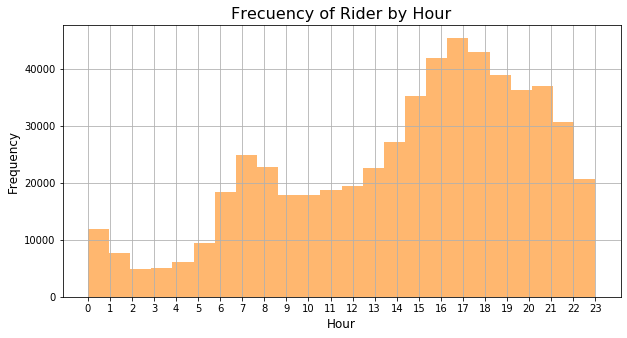

In [11]:
plt.hist(df['Hour'], bins=24)
#sns.distplot(df['Hour'],kde = False)

plt.title('Frecuency of Rider by Hour', fontsize=16)
plt.xticks(range(0,24))
plt.xlabel('Hour', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.rcParams["figure.figsize"] = (10,5)
plt.grid()

###### Graph 3. Uber Ridership by Hour.
We can see that he peak hours of usage if before and after typical office business hours.

### Weekday Usership Usage.
Ridership by weekday

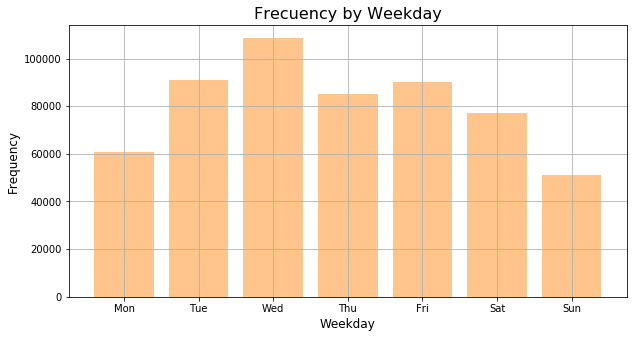

In [21]:
plt.rcParams["figure.figsize"] = (10,5)
plt.hist(df.Weekday, bins=7, range =(-.5,6.5), rwidth=.8, alpha=.8)

plt.title('Frecuency by Weekday', fontsize=16)
plt.xlabel('Weekday', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

plt.xticks(range(7), 'Mon Tue Wed Thu Fri Sat Sun'.split())
plt.grid()

###### Graph 4. Uber ridership by frequency of weekday.
We can see that the day with the most users is Wednesday. A documented highly productive day in most human societies, closely followed by Tuesday and Friday. The day with the least activity is Sunday, also a well-documented low-activity day in most Judo-Christian majority Nation States.

### Cross Analysis (hour, DoW)
We cross analyze the Hour and day of the week

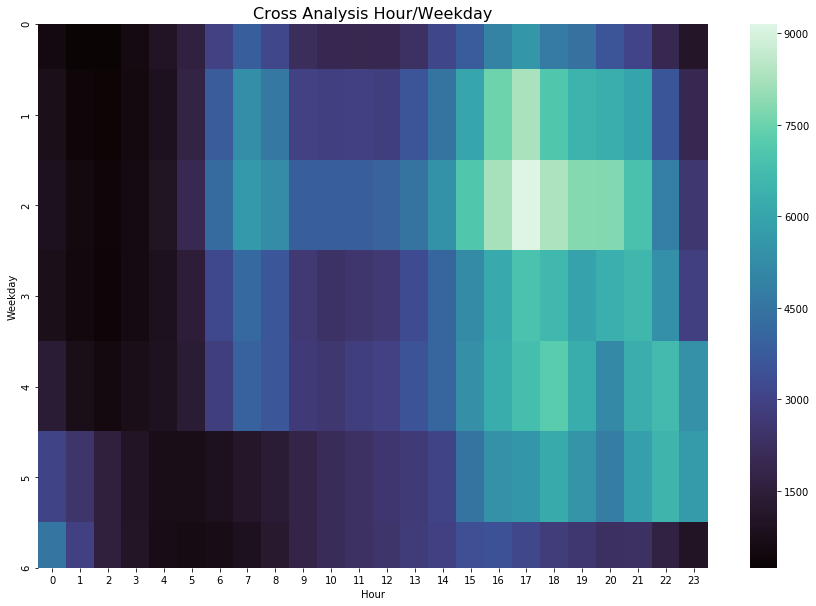

In [13]:
plt.rcParams["figure.figsize"] = (15,10)
cross = df.groupby('Weekday Hour'.split()).apply(countRows).unstack()
sns.heatmap(cross,cmap="mako")

plt.title('Cross Analysis Hour/Weekday', fontsize=16)
plt.savefig('NYCHeatMap.png')

###### Graph 5. The heat map fo the cross analysis of the Hour and Weekday ridership data. 

We can see that the greatest usage is in wednesnday and at 17:00.

### Latitude and Longitude
Before plotting the data in a map, it is sometimes usefull to plot the latitude and longitude data by its self. It allows us to view outliers and special cases in the data.

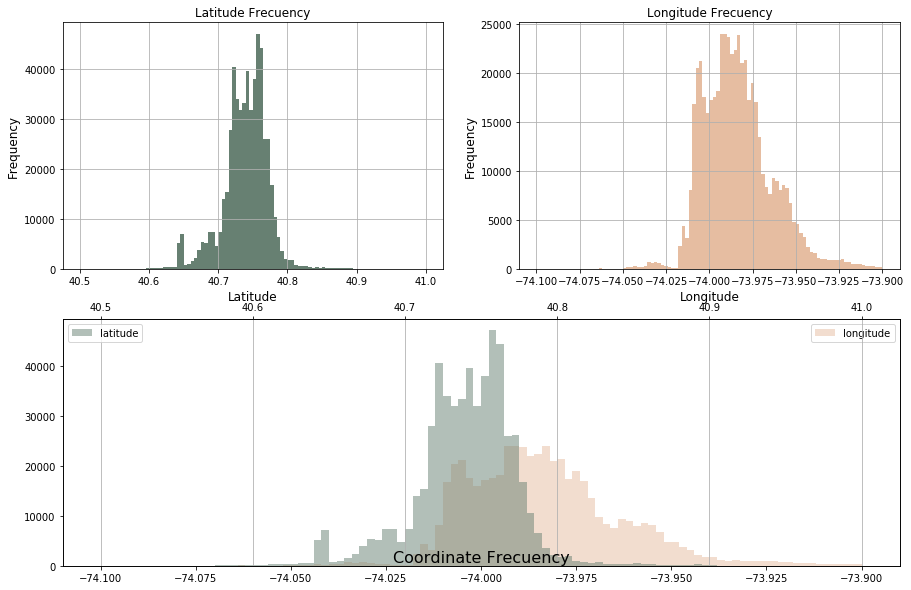

In [14]:
plt.rcParams["figure.figsize"] = (15,10)

    #Right PLot
plt.subplot(2, 2, 1)
plt.hist(df['Lat'], bins=100, range = (40.5, 41), color = '#678072' )
plt.grid()
plt.title('Latitude Frecuency', fontsize=12)
plt.xlabel('Latitude', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

#Using plt.hist we plot the latitude ride data.

#Left Plot
plt.subplot(2, 2, 2)
plt.hist(df['Lon'], bins=100, range = (-74.1, -73.9), color = '#E6BDA1');
plt.grid()
plt.title('Longitude Frecuency', fontsize=12)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

#Using plt.hist we plot the longiude ride data.

#Bottom Plot  
plt.subplot(2, 1, 2)        
plt.hist(df['Lon'], bins=100, range = (-74.1, -73.9), color='#E6BDA1', alpha=.5, label = 'longitude')
plt.legend(loc='upper right')
plt.twiny()
plt.hist(df['Lat'], bins=100, range = (40.5, 41), color='#678072', alpha=.5, label = 'latitude')
plt.legend(loc='upper left')
plt.grid()
plt.title('Coordinate Frecuency',y=-0.01, fontsize=16)         
plt.show()

###### Graph 6. Frecuency of Coordinates. By overlaying the lat and lon data we can easily see special data.

#### Plotting Map

(40.5, 41.2)

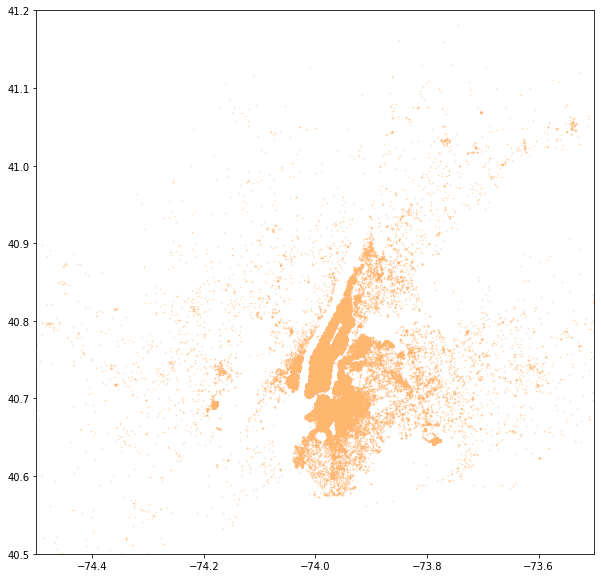

In [15]:
plt.figure(figsize=(10, 10))
plt.plot(df['Lon'], df['Lat'], '.', ms=1, alpha=.5)
plt.xlim(-74.5, -73.5)
plt.ylim(40.50, 41.2)

###### Graph 7. Plotting the latitude and logintude information per ride.

#### Plotting Map of NYC with data using GeoPandas.

In [16]:
# import street map
street_map = gpd.read_file('./geo_export_c0e7a4da-6bf8-42fc-8916-1dd5e4de01b3.shp')

In [17]:
# designate coordinate system
crs = {'init':'espc:4326'}
# zip x and y coordinates into single feature
geometry = [Point(xy) for xy in zip(df['Lon'], df['Lat'])]
# create GeoPandas dataframe
geo_df = gpd.GeoDataFrame(df, crs = crs, geometry = geometry)

In [18]:
geo_df.head()

,Date/Time,Lat,Lon,Base,Day,Weekday,Hour,geometry
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,1,1,0,POINT (-73.95490 40.76900)
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,1,1,0,POINT (-74.03450 40.72670)
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,1,1,0,POINT (-73.98730 40.73160)
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512,1,1,0,POINT (-73.97760 40.75880)
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512,1,1,0,POINT (-73.97220 40.75940)


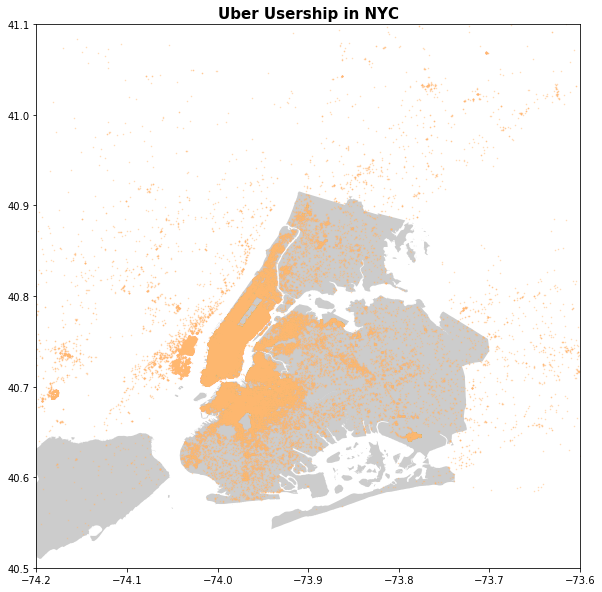

In [19]:
# create figure and axes, assign to subplot
fig, ax = plt.subplots(figsize=(10,10))
# add .shp mapfile to axes
street_map.plot(ax=ax, alpha=0.4,color='grey')
# add geodataframe to axes
# assign ‘price’ variable to represent coordinates on graph
# add legend
# make datapoints transparent using alpha
# assign size of points using markersize

plt.title('Uber Usership in NYC', fontsize=15,fontweight='bold')
# set latitiude and longitude boundaries for map display
plt.xlim(-74.2, -73.6)
plt.ylim(40.5, 41.1)
plt.plot(df['Lon'], df['Lat'], '.', ms=1, alpha=.5)
# show map
plt.show()

###### Graph 8. Plotting ride data over NYC map using GeoPandas.

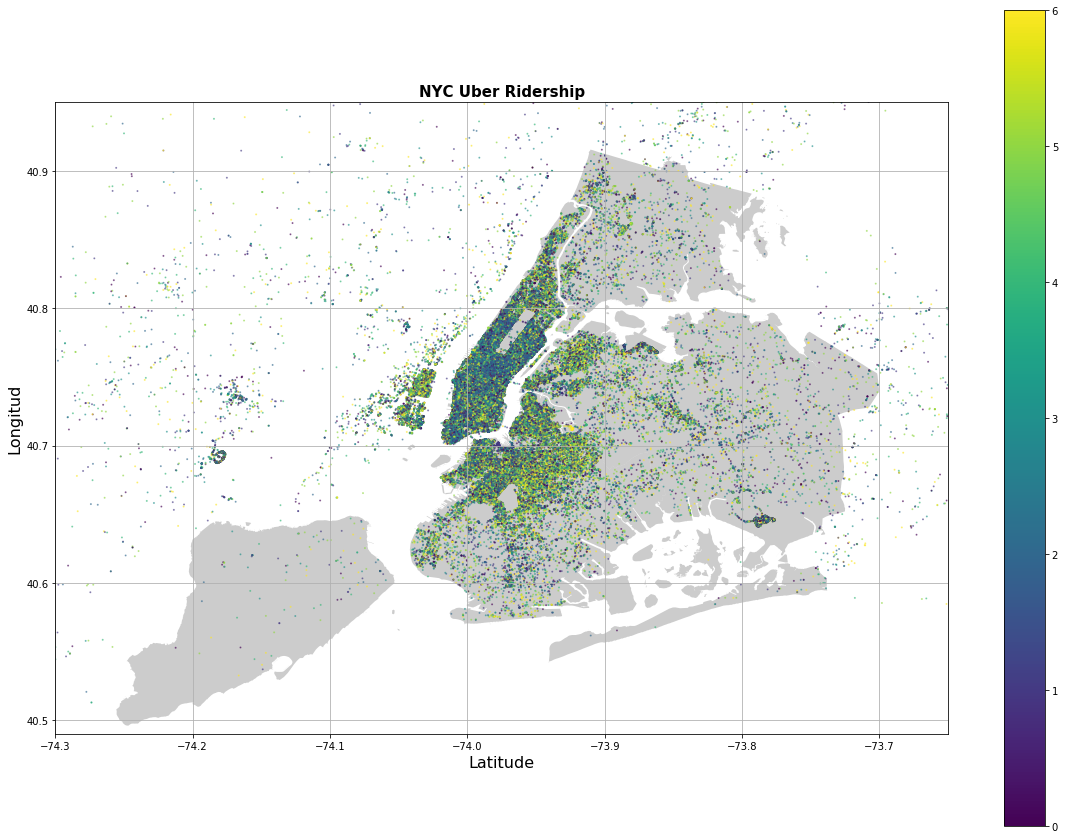

In [20]:
fig, ax = plt.subplots(figsize=(20,15))
street_map.plot(ax=ax, alpha=0.4,color='grey')
geo_df.plot(column='Weekday',ax=ax,alpha=0.5, legend=True,markersize=1)
plt.title('NYC Uber Ridership', fontsize=15,fontweight='bold')
plt.xlim(-74.3, -73.65)
plt.ylim(40.49, 40.95)

plt.ylabel('Longitud', fontsize=16)
plt.xlabel('Latitude', fontsize=16)
plt.grid()

plt.savefig('NYCMapColor.png')

###### Graph 9. Mapping frequency of UBER rides in NYC.